In [2]:
def filter_above_mean(numbers):
    mean_value = sum(numbers) / len(numbers)
    filtered = [x for x in numbers if x > mean_value]
    return filtered, len(filtered)
data = [4, 10, 6, 8, 20, 3]
result, count = filter_above_mean(data)

print(result)
print(count)


[10, 20]
2


In [3]:
import numpy as np


arr = np.random.rand(100)
mean_val = arr.mean()
std_val = arr.std()
threshold = mean_val + std_val
filtered = arr[arr > threshold]


percentage = (filtered.size / arr.size) * 100

mean_val, std_val, filtered, percentage


(np.float64(0.5161699781631185),
 np.float64(0.292189852387448),
 array([0.89855419, 0.84922341, 0.97301055, 0.89204656, 0.94045858,
        0.95392858, 0.91486439, 0.92831856, 0.96665482, 0.96361998,
        0.85300946, 0.85113667, 0.93615477, 0.99005385, 0.87737307,
        0.80936116, 0.81011339, 0.86707232, 0.91324055, 0.89000534,
        0.82260056]),
 21.0)

In [4]:
import pandas as pd
import numpy as np

np.random.seed(42)

df = pd.DataFrame({
    "age": np.random.randint(18, 66, 50),
    "income": np.random.randint(30000, 120001, 50),
    "purchases": np.random.randint(0, 21, 50)
})


income_median = df["income"].median()
purchases_mean = df["purchases"].mean()


filtered_df = df[
    (df["income"] > income_median) &
    (df["purchases"] > purchases_mean)
]


average_age = filtered_df["age"].mean()

average_age


np.float64(43.357142857142854)

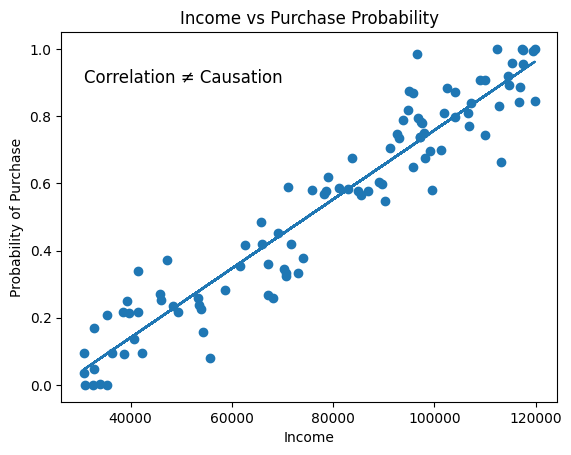

In [5]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)
income = np.random.randint(30000, 120000, 100)

noise = np.random.normal(0, 0.1, 100)
probability_of_purchase = (
    (income - income.min()) / (income.max() - income.min())
) + noise
probability_of_purchase = np.clip(probability_of_purchase, 0, 1)


plt.figure()
plt.scatter(income, probability_of_purchase)


m, b = np.polyfit(income, probability_of_purchase, 1)
plt.plot(income, m * income + b)


plt.text(
    income.min(),
    0.9,
    "Correlation ≠ Causation",
    fontsize=12
)

plt.xlabel("Income")
plt.ylabel("Probability of Purchase")
plt.title("Income vs Purchase Probability")

plt.show()


In [6]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


np.random.seed(42)
n = 1000

df = pd.DataFrame({
    "age": np.random.randint(18, 66, n),
    "income": np.random.randint(30000, 120001, n),
    "visits": np.random.randint(0, 21, n)
})


df["target"] = ((df["income"] > 90000) & (df["visits"] > 6)).astype(int)

X = df[["age", "income", "visits"]]
y = df["target"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.93
